# EDA ON AMAZON REVIEW DATASET



In [1]:
import findspark
findspark.init()

# Loading Data

## Initializing Pyspark

In [2]:
import pyspark
from pyspark.sql import SparkSession

EXE_MEMORY="2G"
DRIVER_MEMORY="8G"
spark = SparkSession.builder.appName("AWS").config("spark.executor.memory", EXE_MEMORY).config("spark.executor.cores", "3").config("spark.driver.memory", DRIVER_MEMORY).getOrCreate()

In [5]:
json_rdd = spark.read.json('C:/Users/salon/Documents/project/All_Amazon_Review.json')

## Schema of Data

In [5]:
json_rdd.printSchema()

root
 |-- asin: string (nullable = true)
 |-- image: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- overall: double (nullable = true)
 |-- reviewText: string (nullable = true)
 |-- reviewTime: string (nullable = true)
 |-- reviewerID: string (nullable = true)
 |-- reviewerName: string (nullable = true)
 |-- style: struct (nullable = true)
 |    |-- Bare Outside Diameter String:: string (nullable = true)
 |    |-- Bore Diameter:: string (nullable = true)
 |    |-- Capacity:: string (nullable = true)
 |    |-- Closed Length String:: string (nullable = true)
 |    |-- Color Name:: string (nullable = true)
 |    |-- Color:: string (nullable = true)
 |    |-- Colorj:: string (nullable = true)
 |    |-- Colour:: string (nullable = true)
 |    |-- Compatible Fastener Description:: string (nullable = true)
 |    |-- Conference Name:: string (nullable = true)
 |    |-- Configuration:: string (nullable = true)
 |    |-- Connectivity:: string (nullable = true)
 |    

In [6]:
json_rdd.show(5)

+----------+-----+-------+--------------------+-----------+--------------+----------------+-----+--------------------+--------------+--------+----+
|      asin|image|overall|          reviewText| reviewTime|    reviewerID|    reviewerName|style|             summary|unixReviewTime|verified|vote|
+----------+-----+-------+--------------------+-----------+--------------+----------------+-----+--------------------+--------------+--------+----+
|B017O9P72A| null|    1.0|Alexa is not able...|12 11, 2015|A27BTSGLXK2C5K|Jacob M. Wessler| null|VERY Buggy, doesn...|    1449792000|   false|null|
|B017O9P72A| null|    4.0|Alexa works great...| 12 8, 2015|A27ZJ1NCBFP1HZ|            Greg| null|      So Far So Good|    1449532800|   false|   5|
|B017O9P72A| null|    1.0|Weak!!

Alexa doe...| 12 7, 2015| ACCQIOZMFN4UK|        Da-Gr8-1| null|         Time waster|    1449446400|   false|  11|
|B017O9P72A| null|    2.0|Can only control ...| 12 5, 2015|A3KUPJ396OQF78|   Larry Russlin| null|               

In [7]:
review_text=json_rdd.select("reviewText")


## ReviewText (each reviewText with wordcount)

In [8]:
#word count by column
import pyspark.sql.functions as f
df = review_text.withColumn('wordCount', f.size(f.split(f.col('reviewText'), ' ')))

In [9]:
df.show()

+--------------------+---------+
|          reviewText|wordCount|
+--------------------+---------+
|Alexa is not able...|       74|
|Alexa works great...|      140|
|Weak!!

Alexa doe...|       21|
|Can only control ...|       12|
|this worked great...|        8|
|         Great skill|        2|
|Pretty crappy. Wo...|        6|
|Not happy. Can no...|        8|
|Can not connect a...|       41|
|The service works...|       21|
|The LifX bulb is ...|       42|
|So easy to connec...|       15|
|I use &ldquo;Echo...|       54|
|Can&rsquo;t conne...|        5|
|I haven't had any...|       23|
|This app forces y...|       69|
|Red all steps and...|        8|
|This skill works ...|      365|
|Who would think y...|       47|
|Lifx is a weird w...|       16|
+--------------------+---------+
only showing top 20 rows



## Total number of wordounts in reviewText

Total number of wordounts in the data is 11880770469.

In [11]:
#word count by column
import pyspark.sql.functions as f
dq = df.withColumn('wordCount', f.size(f.split(f.col('reviewText'), ' ')))

In [13]:
#total word count
import pyspark.sql.functions as f
dq.select(f.sum('wordCount')).collect()

[Row(sum(wordCount)=11880770469)]

## Exploding reviewtexts into words and counding each word

In [14]:
import pyspark.sql.functions as f
df2=df.withColumn('word', f.explode(f.split(f.col('reviewText'), ' ')))\
    .groupBy('word')\
    .count()\
    .sort('count', ascending=False)

In [16]:
df2.show()

+----+---------+
|word|    count|
+----+---------+
| the|504021991|
| and|342033953|
|  to|294284801|
|   I|289512022|
|   a|288876572|
|  of|212184672|
|    |202979410|
|  is|181857764|
|  it|160092066|
|  in|137296673|
| for|136520657|
|this|122811602|
|that|105868408|
| was| 92551196|
|with| 91098063|
|  my| 85724228|
|  on| 78726498|
| but| 76681083|
|have| 70576701|
|  as| 68674777|
+----+---------+
only showing top 20 rows



## Visual Representation of reviewtexts with the wordcounts

We can see in below histogram that in 20 million reviewtexts a large number of reviewtexts are of less than 50 word counts.

In [8]:
df2=df.select('wordCount')

In [18]:
df4=df2.limit(20000000).toPandas()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022819D60348>]],
      dtype=object)

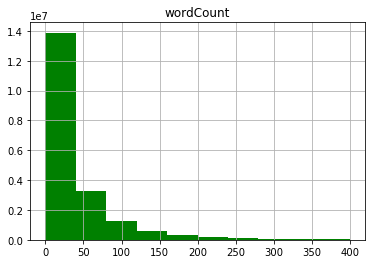

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df4.hist('wordCount',range=(0,400), color='green')

## Counting each character of reviewtexts

There are 64470979792 number of total characters.

In [11]:
#Charachter count by column
import pyspark.sql.functions as f

df2=df.withColumn('Char', f.explode(f.split(f.col('reviewText'), '')))\
    .groupBy('Char')\
    .count()\
    .sort('Count', ascending=False)

In [13]:
#number of characters
import pyspark.sql.functions as f

df2.select(f.sum('Count')).collect()


[Row(sum(Count)=64470979792)]

## Hundred charaters with its counts

In [14]:
df2.show(100)

+----+-----------+
|Char|      count|
+----+-----------+
|    |11648021910|
|   e| 5924410570|
|   t| 4661518291|
|   o| 3900198613|
|   a| 3840663249|
|   i| 3338031452|
|   s| 3167042811|
|   n| 3088565524|
|   r| 2886666918|
|   h| 2544464926|
|   l| 2124101056|
|   d| 1869870108|
|   u| 1419619980|
|   c| 1300598447|
|   m| 1125343175|
|   y| 1078720307|
|   g| 1040632075|
|   f| 1020690100|
|   w|  956866332|
|   p|  929716274|
|   .|  822530548|
|   b|  793035588|
|   v|  575851565|
|   k|  522991281|
|   I|  448938279|
|   ,|  410820471|
|    |  232901943|
|   T|  227506499|
|   '|  203424382|
|   
|  145027815|
|   A|  116084048|
|   !|  115014518|
|   S|  107228138|
|   x|  104631253|
|   -|  104225238|
|   j|   75554140|
|   "|   73190739|
|   E|   72716813|
|   W|   70942294|
|   M|   70055424|
|   C|   67808274|
|   B|   67364013|
|   H|   63376886|
|   O|   60486749|
|   D|   60397538|
|   L|   59951741|
|   G|   59679212|
|   N|   55677717|
|   z|   55340756|
|   P|   520

## Creating Table and Graphic Representation of "overall" Variable with its Frequency

In [ ]:
char=df2.toPandas()
export_csv=char.to_csv
dl=json_rdd.select("overall")
dl2=dl.groupby("overall").count().sort("overall")

In [17]:
dl2.show()

+-------+---------+
|overall|    count|
+-------+---------+
|    0.0|        9|
|    1.0| 18256432|
|    2.0| 10979213|
|    3.0| 17809027|
|    4.0| 37360696|
|    5.0|148649950|
+-------+---------+



In [18]:
pdf=dl2.toPandas()

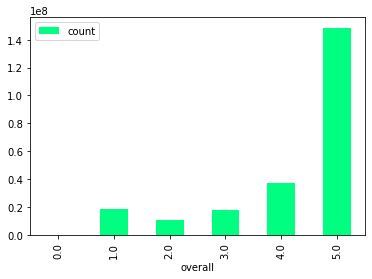

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
pdf.plot(kind='bar', x='overall', y='count', colormap='winter_r')